Impact des mois avec promotion

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df_stores = pd.read_csv('./data/store.csv')
df_train = pd.read_csv('./data/train.csv')

In [3]:
df = df_train.merge(df_stores, left_on='Store', right_on='Store')
df.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

In [4]:
df['Date'] = pd.to_datetime(df['Date'])
df['PromoInterval'] = df['PromoInterval'].fillna('No Promo2')


In [5]:
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
df_sales = df.groupby(df['Date'].dt.strftime('%B'))['Sales'].sum().reindex(new_order, axis=0)

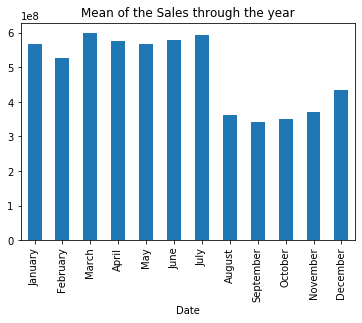

In [6]:
df_sales.plot.bar(title='Mean of the Sales through the year')

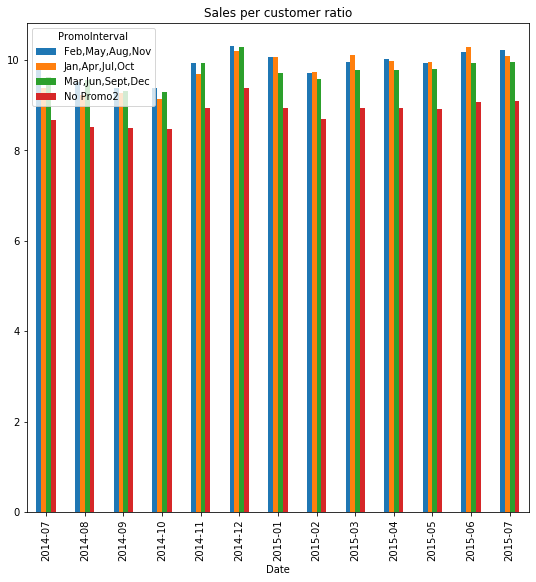

In [9]:
df_grouped_sum = df.groupby([df.Date.dt.to_period("M"), 'PromoInterval']).sum()
df_grouped_sum['Sales per Customer ratio'] = df_grouped_sum['Sales'] / df_grouped_sum['Customers']
df_grouped_sum.loc['2014-07':'2015-07']['Sales per Customer ratio'].unstack().plot.bar(figsize=(9,9), title='Sales per customer ratio')

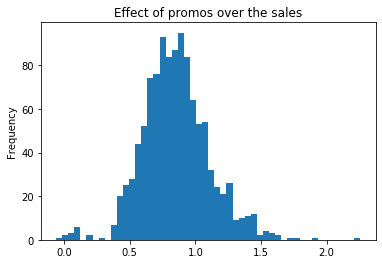

In [127]:
df_grouped = df.groupby(['Store', 'Promo']).mean()
df_grouped.head()
df_grouped = df_grouped.unstack()
df_promoEffect = df_grouped['Sales']
df_promoEffect['PromoEffect'] = df_promoEffect[1] - df_promoEffect[0]
df_promoEffect['PromoEffect'] = df_promoEffect['PromoEffect'] / df_promoEffect[0]
df_promoEffect['PromoEffect'].plot.hist(bins=50, title='Effect of promos over the sales')
